# Load data

In [1]:
import json


datapath = "./data/corpus.jsonl"

lines = []

with open(datapath) as datafile:
    for line in datafile:
        lines.append(json.loads(line)["text"])

corpus = " ".join(lines)

# Task 1
Devise two regular expressions:

- extracting times, e.g. recognizing 20:30 as an instance of a time.

In [2]:
import regex as re


def extract_times(text: str):
    time_pattern = r"\b(?:\d|[01]\d|2[0-3]):[0-5]\d\b"
    return re.findall(time_pattern, text)

- extracting dates, e.g. recognizing 20 września as an instance of date.

In [3]:
months_nominative = ["styczeń", "luty", "marzec", "kwiecień", "maj", "czerwiec", "lipiec", "sierpień", "wrzesień", "październik", "listopad", "grudzień"]
months_genitive = ["stycznia", "lutego", "marca", "kwietnia", "maja", "czerwca", "lipca", "sierpnia", "września", "października", "listopada", "grudnia"]

def extract_dates(text: str):
    months_pattern = r"|".join(months_nominative + months_genitive)
    polish_date_pattern = r"\b\d{1,2}\s(?:" + months_pattern + r")\b"
    return re.findall(polish_date_pattern, text, flags=re.IGNORECASE)

# Task 2
Search for occurrences of times and dates in the dataset.

In [4]:
times = extract_times(corpus)
dates = extract_dates(corpus)

# Task 3
Plot results from point 2:

- for times create a bar plot for full hours.

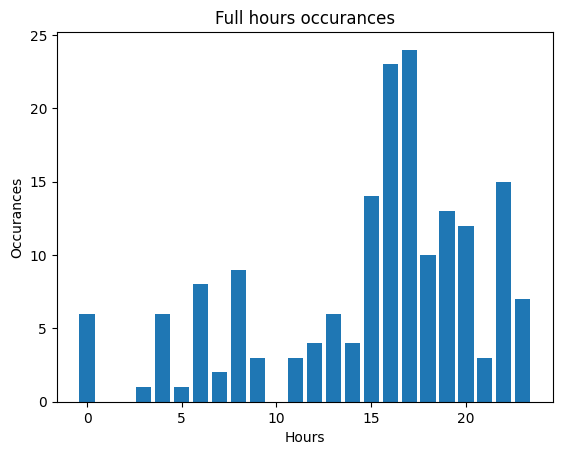

In [5]:
import matplotlib.pyplot as plt


hours = list(range(24))
full_hours_occuranes = {hour: 0 for hour in hours}

for time in times:
    hour, minutes = map(lambda t: int(t), time.split(":"))
    if minutes == 0:
        full_hours_occuranes[hour] += 1

plt.bar(hours, full_hours_occuranes.values())
plt.xlabel("Hours")
plt.ylabel("Occurances")
plt.title('Full hours occurances')
plt.show()

- for dates create a bar plot for months.

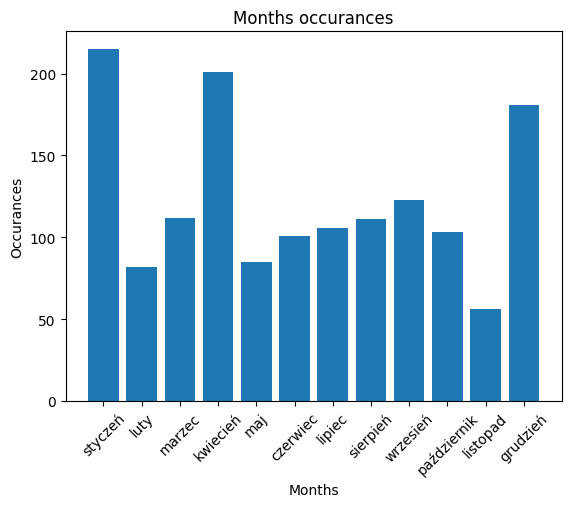

In [6]:
months_occuranes = {month: 0 for month in months_nominative}

for date in dates:
    month = date.split(" ")[1].lower()
    if month in months_nominative:
        months_occuranes[month] += 1
    else:
        months_occuranes[months_nominative[months_genitive.index(month)]] += 1

plt.bar(months_nominative, months_occuranes.values())
plt.xlabel("Months")
plt.ylabel("Occurances")
plt.title('Months occurances')
plt.xticks(rotation = 45)
plt.show()

# Task 4
Compute the number of occurrences of styczeń word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden).

In [7]:
def extract_polish_january(text: str, preceded_by_number: bool | None = None):
    polish_january_pattern = r"\bstycz(?:eń|ni|nia|niach|niami|nie|niem|niom|niów|niowi|niu|niowy|niowa|niowe|niowo)\b"
    if preceded_by_number == True:
        polish_january_pattern = r"\b\d+\s" + polish_january_pattern
    if preceded_by_number == False:
        polish_january_pattern = r"\b(?<!\d+\s)" + polish_january_pattern
    return re.findall(polish_january_pattern, text, flags=re.IGNORECASE)


polish_january_occurances = len(extract_polish_january(corpus))
print(f"Number of occurrences of styczeń word in any inflectional form is {polish_january_occurances}")

Number of occurrences of styczeń word in any inflectional form is 468


# Task 5
As in 4, but preceded by a number and a space.

In [8]:
polish_january_preceded_by_number_occurances = len(extract_polish_january(corpus, preceded_by_number=True))
print(f"Number of occurrences of styczeń word in any inflectional form preceded by a number and a space is {polish_january_preceded_by_number_occurances}")

Number of occurrences of styczeń word in any inflectional form preceded by a number and a space is 215


# Task 6
As in 4, but not preceded by a number and a space.

In [9]:
polish_january_not_preceded_by_number_occurances = len(extract_polish_january(corpus, preceded_by_number=False))
print(f"Number of occurrences of styczeń word in any inflectional form not preceded by a number and a space is {polish_january_not_preceded_by_number_occurances}")

Number of occurrences of styczeń word in any inflectional form not preceded by a number and a space is 253


# Questions

## Are regular expressions good at capturing times?

Regular expressions are good for capturing times as long as they have a specific format. However, they can be very complex when we want to read the time from everyday speech, e.g. in Polish when we say "o 2" this refers to the time when we later have "po południu", "w nocy", "godzinie", etc.

## Are regular expressions good at capturing dates?

As with time, regex is good for capturing simple examples. However, natural languages ​​allow for specifying dates in many ways and a regex to cover all of them would be very complex.

## How one can be sure that the expression has matched all and only the correct expressions of a given type?

As long as we clearly define what the regular expression should match, we can create unit tests for it that will check the edge cases.